In [1]:
import os
os.chdir(r'C:\Users\Admin\Downloads')

In [38]:
#-----------Loading Libraries------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn import model_selection

In [58]:
df=pd.read_csv('Social_Network_Ads.csv')

In [59]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [14]:
x=df.iloc[:,2:4].values

In [60]:
x

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [61]:
y=df.iloc[:,-1].values

In [62]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [63]:
from sklearn.preprocessing import StandardScaler
SC_x= StandardScaler()
x= SC_x.fit_transform(x)
x

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [65]:
len(x_train)

280

In [66]:
len(x_test)

120

In [67]:
mylist = list(range(0,50))
neighbor= list(filter(lambda x: x%2!=0 ,mylist))
neighbor

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49]

In [68]:
neighbor
cv_scores=[]
for k in neighbor:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
print(cv_scores)

[0.8464285714285715, 0.8821428571428571, 0.9071428571428571, 0.9071428571428569, 0.9107142857142856, 0.8999999999999998, 0.9035714285714285, 0.8999999999999998, 0.8964285714285714, 0.8928571428571429, 0.8928571428571429, 0.8892857142857142, 0.8928571428571429, 0.8964285714285716, 0.9, 0.8964285714285716, 0.8964285714285716, 0.9, 0.8928571428571429, 0.8928571428571429, 0.8928571428571429, 0.8928571428571429, 0.8857142857142858, 0.875, 0.875]


In [69]:
MSE=[1-x for x in cv_scores]
optimal_k = neighbor[MSE.index(min(MSE))]


In [70]:
optimal_k

9

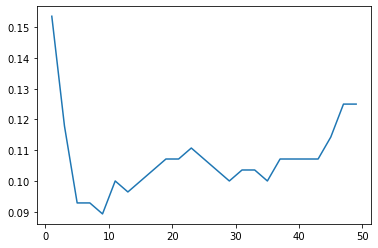

In [71]:
import matplotlib.pyplot as plt
plt.plot(neighbor,MSE)

In [72]:
knn_optimal=KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(x_train,y_train)
y_pred=knn_optimal.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc

0.9083333333333333

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[72,  7],
       [ 4, 37]], dtype=int64)

#naive bayes algorithm

In [75]:
var_smoothing=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
from sklearn.naive_bayes import GaussianNB
cv_scores=[]
for vs in var_smoothing:
    nbg=GaussianNB(var_smoothing=vs)
    scores=cross_val_score(nbg,x_train,y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
print(cv_scores)
    

[0.8678571428571429, 0.8428571428571429, 0.8357142857142856, 0.825, 0.8178571428571428, 0.8107142857142857, 0.7964285714285714, 0.7964285714285714, 0.7892857142857141, 0.7857142857142857]


In [77]:
MSE=[1-x for x in cv_scores]
optimal_vs=var_smoothing[MSE.index(min(MSE))]
optimal_vs

0.1

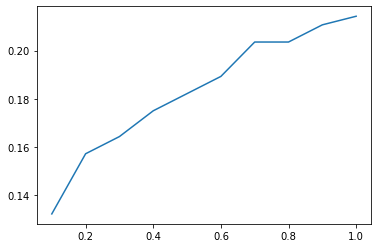

In [78]:
import matplotlib.pyplot as plt
plt.plot(var_smoothing,MSE)

In [84]:
nbg_optimal=GaussianNB(var_smoothing=optimal_vs)
nbg_optimal.fit(x_train,y_train)
y_pred=nbg_optimal.predict(x_test)
acc=accuracy_score(y_pred,y_test)
acc

0.8833333333333333

In [85]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[76,  3],
       [11, 30]], dtype=int64)